El objetivo es maximizar la función no lineal:

𝑓
(
𝑥
)
=
𝑥
⋅
sin
⁡
(
10
𝜋
𝑥
)
+
1
,
con
𝑥
∈
[
0
,
1
]
Esta función tiene múltiples máximos locales debido a la componente trigonométrica, lo que la convierte en un buen caso de estudio para algoritmos de optimización heurística, como los algoritmos genéticos (AG). Métodos clásicos de optimización como el gradiente pueden quedar atrapados en óptimos locales, mientras que los AG, por su naturaleza evolutiva y estocástica, pueden explorar mejor el espacio de búsqueda.

El programa utiliza un algoritmo genético básico para encontrar el valor de
𝑥 que maximiza la función
𝑓(𝑥)
en el intervalo
[
0
,
1
]
[0,1].


Mejor x encontrado: 0.8515754940108339
f(x) = 1.8505326058087292


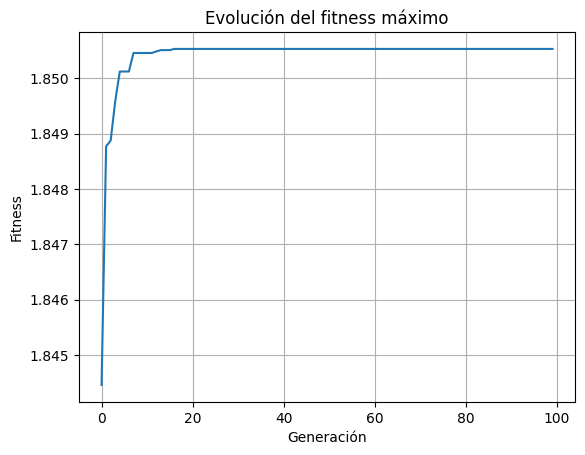

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parámetros
num_individuos = 30
num_generaciones = 100
long_cromosoma = 16  # precisión de 2^16 posibles valores
prob_crossover = 0.7
prob_mutacion = 0.01

# Función objetivo
def f(x):
    return x * np.sin(10 * np.pi * x) + 1

# Decodificar binario a real en [0, 1]
def binario_a_real(cromosoma):
    decimal = int(cromosoma, 2)
    return decimal / (2**long_cromosoma - 1)

# Crear población inicial
def crear_poblacion():
    return [''.join(random.choices('01', k=long_cromosoma)) for _ in range(num_individuos)]

# Selección por torneo (de 2)
def seleccion(poblacion):
    a, b = random.sample(poblacion, 2)
    return a if f(binario_a_real(a)) > f(binario_a_real(b)) else b

# Crossover de un punto
def crossover(p1, p2):
    if random.random() < prob_crossover:
        punto = random.randint(1, long_cromosoma - 1)
        return p1[:punto] + p2[punto:], p2[:punto] + p1[punto:]
    else:
        return p1, p2

# Mutación bit a bit
def mutar(cromosoma):
    return ''.join(
        bit if random.random() > prob_mutacion else ('1' if bit == '0' else '0')
        for bit in cromosoma
    )

# Algoritmo genético
def algoritmo_genetico():
    poblacion = crear_poblacion()
    mejores = []

    for _ in range(num_generaciones):
        nueva_poblacion = []

        for _ in range(num_individuos // 2):
            p1, p2 = seleccion(poblacion), seleccion(poblacion)
            h1, h2 = crossover(p1, p2)
            nueva_poblacion += [mutar(h1), mutar(h2)]

        poblacion = nueva_poblacion

        mejor = max(poblacion, key=lambda c: f(binario_a_real(c)))
        mejores.append(f(binario_a_real(mejor)))

    return poblacion, mejores

# Ejecutar
poblacion_final, historial = algoritmo_genetico()

# Mostrar mejor resultado
mejor_individuo = max(poblacion_final, key=lambda c: f(binario_a_real(c)))
mejor_x = binario_a_real(mejor_individuo)
print(f"Mejor x encontrado: {mejor_x}")
print(f"f(x) = {f(mejor_x)}")

# Graficar evolución
plt.plot(historial)
plt.title("Evolución del fitness máximo")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()
